In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import wandb

In [95]:
# project = "Elissabeth Long Lookup 2"
project = "Elissabeth Makemore"
model_id = ("e2rtphhp", "27mykeat", "3i8b4895", "li1orwup")
names = ("No kernel", r"$\mathbb{C}$-exp, exp-decay", "exp-decay", "MSC, exp-decay")

In [52]:
api = wandb.Api()

In [83]:
def get_metric(run, name: str) -> np.ndarray:
    return np.array([row[name] for row in run.scan_history(keys=[name])])

In [55]:
train_acc = []
val_acc = []
train_loss = []
val_loss = []

for ids in model_id:
    run = api.run(f"krieg-team/{project}/{ids}")

    train_acc.append(get_metric(run, "train/accuracy"))
    val_acc.append(get_metric(run, "validation/accuracy"))
    train_loss.append(get_metric(run, "train/loss"))
    val_loss.append(get_metric(run, "validation/loss"))

AttributeError: 'list' object has no attribute 'shape'

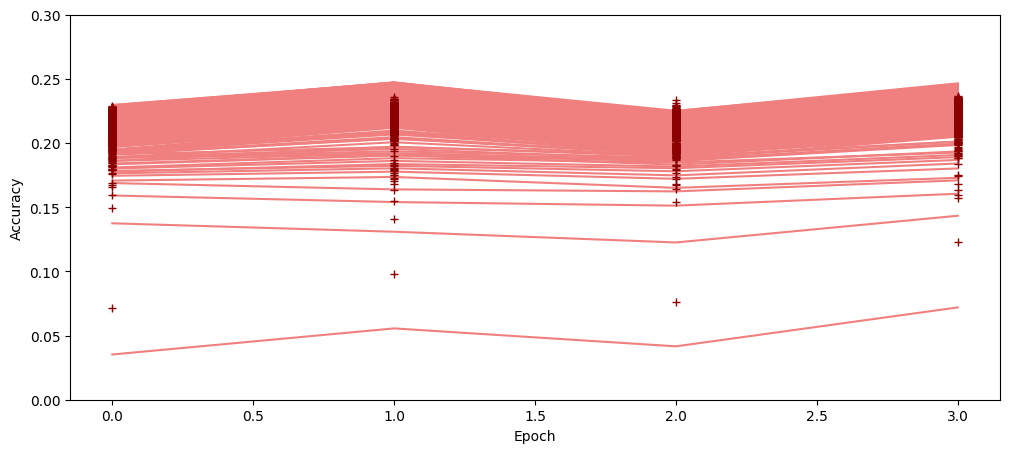

In [84]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))

ax.plot(train_acc, "-", label="train accuracy", color="lightcoral")
ax.plot(val_acc, "+", label="validation accuracy", color="darkred")
ax.plot([], "-", label="train loss", color="lightgreen")
ax.plot([], "x", label="validation loss", color="darkgreen")
ax.set_xlabel("Epoch")
ax.set_ylim(0, .3)
ax.set_ylabel("Accuracy")
ax.set_xlim(-5, train_acc.shape[0]+5)
ax.set_xticks([i*1000 for i in range(train_acc.shape[0]//1000+1)])
ax.legend(loc="lower left")

twinax = ax.twinx()
twinax.plot(train_loss, "-", label="train loss", color="lightgreen")
twinax.plot(val_loss, "x", label="validation loss", color="darkgreen")
# twinax.set_yscale("log")
twinax.set_ylim(1.9, 3.5)
twinax.set_ylabel("Loss", rotation=270)

# plt.savefig(
#     Path.cwd() / f"metrics_{model_id}.pdf",
#     bbox_inches="tight",
#     facecolor=(0, 0, 0, 0),
# )
plt.show()

In [ ]:
# colors = [("lightgreen")]

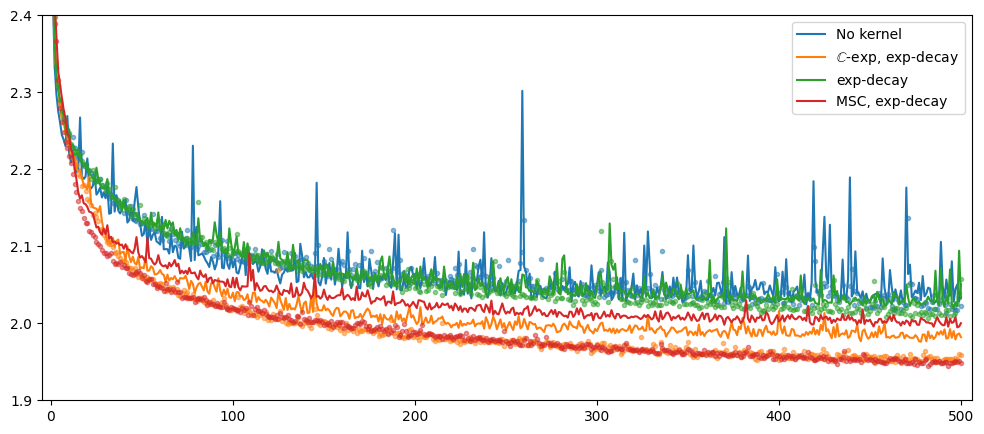

In [99]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))

cmap = plt.get_cmap("tab10")
for i in range(len(model_id)):
    ax.plot(
        train_loss[i],
        ".",
        # label=f"train {names[i] if names is not None else model_id[i]}",
        color=cmap(i)[:3] + (0.5, ),
    )
    ax.plot(
        val_loss[i],
        "-",
        label=f"{names[i] if names is not None else model_id[i]}",
        color=cmap(i),
    )
    ax.set_xlim(-5, train_loss[i].shape[0]+5)
    ax.set_xticks([i*100 for i in range(train_loss[i].shape[0]//100+1)])
    ax.set_ylim(1.9, 2.4)
    ax.legend(loc="upper right")
plt.savefig(
    Path.cwd() / f"metrics_makemore_comparison.pdf",
    bbox_inches="tight",
    facecolor=(0, 0, 0, 0),
)